In [ ]:
import os
import datetime
import matplotlib.pyplot as plt
#Plots T2 
import sys
import os

# Suppress output
sys.stdout = open(os.devnull, 'w')

# Your code here that generates lots of output
for i in range(100000):
    print(i)  # This won't be printed

# Re-enable output
sys.stdout = sys.__stdout__

print("Output re-enabled.")


# Define the file names (can be up to 8 files)
files = ["SA-022_0.txt", "SA-024_1.TXT", "SA-025_2.TXT", "SA-026_4.TXT", "SA-034_5.TXT", "SA-033_6.TXT", "SA-037_7.TXT"]

# Initialize lists to store data for each file
all_time_lists = []
all_t2_lists = []
all_t3_lists = []
file_labels = []

# Prompt the user to enter a custom label for each file
custom_labels = {}
for file in files:
    label = input(f"Enter a custom label for {file} (or press Enter to use the filename): ")
    custom_labels[file] = label if label else os.path.basename(file)

# Process each file
for file in files:
    if not os.path.exists(file):
        print(f"Error: The file {file} does not exist.")
        continue

    print(f"Processing file: {file}")

    # Initialize lists to store time, T2, and T3 data for this file
    time_list = []
    t2_list = []
    t3_list = []

    # Open the input file with an appropriate encoding
    with open(file, encoding="utf-8", errors='ignore') as fr:
        # Skip the first 8 lines of .txt i.e., remove the header
        for _ in range(8):
            fr.readline()

        first = False
        t0 = 0

        # Processing the file line by line
        for line in fr.readlines():
            line = line.strip()

            if len(line) == 0:  # Skip empty lines
                continue

            print(f"Processing line: {line}")

            if "restarted" in line:
                first = True
                continue    

            if not first: 
                continue

            chk = line.split("\t")
            print(f"Parsed line into columns: {chk}")  # Debugging: show split columns

            try:
                # Parsing the date and time
                time = datetime.datetime.strptime(chk[0], "%m/%d/%Y %I:%M:%S %p")
                t2 = float(chk[2])
                t3 = float(chk[3])

                rtime_convert = (time - datetime.datetime(1970, 1, 1)).total_seconds()

                if t0 == 0: 
                    t0 = rtime_convert
                tt = (rtime_convert - t0) /60  # Convert time from seconds to minutes

                time_list.append(tt)
                t2_list.append(t2)
                t3_list.append(t3)

            except ValueError as ve:
                print(f"Skipping line due to error: {ve}")
                continue

    # Store data for this file if it has valid entries
    if time_list and t2_list and t3_list:
        all_time_lists.append(time_list)
        all_t2_lists.append(t2_list)
        all_t3_lists.append(t3_list)
        file_labels.append(custom_labels[file])
    else:
        print(f"No valid data found in file: {file}")

# Plotting with matplotlib
if all_time_lists:
    plt.figure(figsize=(12, 10))

    # Plot 1: Temperature T2 vs Time
    plt.subplot(2, 1, 1)
    for time_list, t2_list, label in zip(all_time_lists, all_t2_lists, file_labels):
        plt.plot(time_list, t2_list, label=f'T₂ - {label}')
    #plt.title('Temperature T₂ vs Time')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Temperature T₂ (C)')
    plt.ylim(0, 75)  # Set Y-axis limit
    #plt.xlim(0, 480)  # Set x-axis limit
    plt.grid(True)
    plt.legend()
      # Customize the Y-axis ticks
    y_ticks = plt.yticks()[0]  # Get current Y-ticks
    y_labels = [f'OTP 70' if y == 70 else f'{y:.0f}' for y in y_ticks]  # Replace 70 with 'OTP'
    plt.yticks(y_ticks, y_labels)
   # plt.text(2, 75, 'Preliminary', fontsize=20, color='black', ha='left')  # Add text on gr

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot.")





T2 AND T3

In [ ]:

#YEEE
import sys
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Suppress output for large datasets
sys.stdout = open(os.devnull, 'w')

# Re-enable output
sys.stdout = sys.__stdout__
print("Output re-enabled.")

# Define the file names
files = ["SA-002_0.TXT", "SA-008_1.TXT", "SA-027_2.TXT", "SA-010_4.TXT","SA-039_5.TXT", "SA-035_6.TXT", "SA-013_7.TXT"]
all_time_lists = []
all_t2_lists = []
all_t3_lists = []
file_labels = []

# Get custom labels
custom_labels = {}
for file in files:
    label = input(f"Enter a custom label for {file} (or press Enter to use the filename): ")
    custom_labels[file] = label if label else os.path.basename(file)

# Process files
for file in files:
    if not os.path.exists(file):
        print(f"Error: The file {file} does not exist.")
        continue

    print(f"Processing file: {file}")
    time_list = []
    t2_list = []
    t3_list = []

    with open(file, encoding="utf-8", errors='ignore') as fr:
        for _ in range(8):
            fr.readline()

        first = False
        t0 = 0

        for line in fr.readlines():
            line = line.strip()
            if len(line) == 0:
                continue

            if "restarted" in line:
                first = True
                continue

            if not first:
                continue

            chk = line.split("\t")

            try:
                time = datetime.datetime.strptime(chk[0], "%m/%d/%Y %I:%M:%S %p")
                t2 = float(chk[2])
                t3 = float(chk[3])

                rtime_convert = (time - datetime.datetime(1970, 1, 1)).total_seconds()

                if t0 == 0:
                    t0 = rtime_convert
                tt = (rtime_convert - t0) / 3600

                time_list.append(tt)
                t2_list.append(t2)
                t3_list.append(t3)

            except ValueError as ve:
                print(f"Skipping line due to error: {ve}")
                continue

    if time_list and t2_list and t3_list:
        all_time_lists.append(time_list)
        all_t2_lists.append(t2_list)
        all_t3_lists.append(t3_list)
        file_labels.append(custom_labels[file])
    else:
        print(f"No valid data found in file: {file}")

# Synchronize time
common_time = np.linspace(0, max([max(lst) for lst in all_time_lists]), num=500)

interpolated_t2 = []
interpolated_t3 = []

for time_list, t2_list, t3_list in zip(all_time_lists, all_t2_lists, all_t3_lists):
    f_t2 = interp1d(time_list, t2_list, bounds_error=False, fill_value="extrapolate")
    f_t3 = interp1d(time_list, t3_list, bounds_error=False, fill_value="extrapolate")

    interpolated_t2.append(f_t2(common_time))
    interpolated_t3.append(f_t3(common_time))

mean_t2 = np.mean(interpolated_t2, axis=0)
mean_t3 = np.mean(interpolated_t3, axis=0)

# Plotting with updated font sizes
plt.figure(figsize=(12, 10))

# First subplot (T2)
plt.subplot(2, 1, 1)
for time_list, t2_list, label in zip(all_time_lists, all_t2_lists, file_labels):
    plt.plot(time_list, t2_list, label=f'{label}')

plt.xlabel('Time (Hours)', fontsize=18)
plt.ylabel('T$_2$(°C)', fontsize=18)
plt.ylim(0, 75)
plt.xlim(0, 8)
plt.grid(True)

# Increased font size for axis numbers
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Improved legend placement
plt.legend(fontsize=14, loc='lower left', framealpha=0.7)

# OTP line and label formatting
plt.axhline(y=70, color='red', linestyle='--')
y_ticks = plt.yticks()[0]
y_labels = [f'OTP 70' if y == 70 else f'{y:.0f}' for y in y_ticks]
plt.yticks(y_ticks, y_labels)

# Second subplot (T3)
plt.subplot(2, 1, 2)
for time_list, t3_list, label in zip(all_time_lists, all_t3_lists, file_labels):
    plt.plot(time_list, t3_list, label=f'{label}')

plt.xlabel('Time (Hours)', fontsize=18)
plt.ylabel('T$_3$ (°C)', fontsize=18)
plt.ylim(0, 75)
plt.xlim(0, 8)
plt.grid(True)

# Increased font size for axis numbers
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Improved legend placement
plt.legend(fontsize=14, loc='lower left', framealpha=0.7)

# OTP line and label foXrmatting
plt.axhline(y=70, color='red', linestyle='--')
y_ticks = plt.yticks()[0]
y_labels = [f'OTP 70' if y == 70 else f'{y:.0f}' for y in y_ticks]
plt.yticks(y_ticks, y_labels)

plt.tight_layout()
plt.show()


Output re-enabled.



# This plots I_In and IOut

In [ ]:
import sys
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d  # For interpolation

# Suppress output for large datasets
sys.stdout = open(os.devnull, 'w')

# Re-enable output
sys.stdout = sys.__stdout__

print("Output re-enabled.")

# Define the file names (can be up to 8 files)
files = ["SA-022_0.txt", "SA-024_1.TXT", "SA-025_2.TXT", "SA-026_4.TXT", "SA-034_5.TXT", "SA-033_6.TXT", "SA-037_7.TXT"]
# Initialize lists to store data for each file
all_time_lists = []
all_t2_lists = []
all_t3_lists = []
file_labels = []

# Prompt the user to enter a custom label for each file
custom_labels = {}
for file in files:
    label = input(f"Enter a custom label for {file} (or press Enter to use the filename): ")
    custom_labels[file] = label if label else os.path.basename(file)

# Process each file
for file in files:
    if not os.path.exists(file):
        print(f"Error: The file {file} does not exist.")
        continue

    print(f"Processing file: {file}")

    # Initialize lists to store time, T2, and T3 data for this file
    time_list = []
    t2_list = []
    t3_list = []

    # Open the input file with an appropriate encoding
    with open(file, encoding="utf-8", errors='ignore') as fr:
        # Skip the first 8 lines of .txt i.e., remove the header
        for _ in range(8):
            fr.readline()

        first = False
        t0 = 0

        # Processing the file line by line
        for line in fr.readlines():
            line = line.strip()

            if len(line) == 0:  # Skip empty lines
                continue

            if "restarted" in line:
                first = True
                continue    

            if not first: 
                continue

            chk = line.split("\t")

            try:
                # Parsing the date and time
                time = datetime.datetime.strptime(chk[0], "%m/%d/%Y %I:%M:%S %p")
                t2 = float(chk[2])
                t3 = float(chk[3])

                rtime_convert = (time - datetime.datetime(1970, 1, 1)).total_seconds()

                if t0 == 0: 
                    t0 = rtime_convert
                tt = (rtime_convert - t0) /60  # Convert time from seconds to minutes

                time_list.append(tt)
                t2_list.append(t2)
                t3_list.append(t3)

            except ValueError as ve:
                print(f"Skipping line due to error: {ve}")
                continue

    # Store data for this file if it has valid entries
    if time_list and t2_list and t3_list:
        all_time_lists.append(time_list)
        all_t2_lists.append(t2_list)
        all_t3_lists.append(t3_list)
        file_labels.append(custom_labels[file])
    else:
        print(f"No valid data found in file: {file}")

# Synchronizing time across all files
# Determine a common time range and create an interpolation function for each dataset
common_time = np.linspace(0, max([max(lst) for lst in all_time_lists]), num=500)  # Define 500 common time points

interpolated_t2 = []
interpolated_t3 = []

for time_list, t2_list, t3_list in zip(all_time_lists, all_t2_lists, all_t3_lists):
    # Interpolate the T2 and T3 data to match the common time points
    f_t2 = interp1d(time_list, t2_list, bounds_error=False, fill_value="extrapolate")
    f_t3 = interp1d(time_list, t3_list, bounds_error=False, fill_value="extrapolate")
    
    interpolated_t2.append(f_t2(common_time))
    interpolated_t3.append(f_t3(common_time))

# Calculate the mean for each time point across all files
mean_t2 = np.mean(interpolated_t2, axis=0)
mean_t3 = np.mean(interpolated_t3, axis=0)

# Plotting with matplotlib
plt.figure(figsize=(12, 10))

# Plot 1: Mean Temperature T2 vs Time
plt.subplot(2, 1, 1)
for time_list, t2_list, label in zip(all_time_lists, all_t2_lists, file_labels):
    plt.plot(time_list, t2_list, label=f'{label}')
#plt.plot(common_time, mean_t2, color='black', linewidth=2, label='Mean T2', linestyle='--')  # Mean T2 plot
#plt.title('Temperature T2 vs Time')
plt.xlabel('Time (Hours)')
plt.ylabel('T$_2$(°C)')
plt.ylim(-70, 75)  # Set Y-axis limit
plt.grid(True)
plt.legend()

# Add dashed line indicating OTP at y = 70
plt.axhline(y=70, color='red', linestyle='--', label='OTP 70')

# Add the text "OTP" next to the red dashed line
plt.text(0.5, 70.5, 'OTP', color='red', fontsize=12, verticalalignment='bottom', horizontalalignment='center')

# Customize the Y-axis ticks
y_ticks = plt.yticks()[0]  # Get current Y-ticks
y_labels = [f'OTP 70' if y == 70 else f'{y:.0f}' for y in y_ticks]  # Replace 70 with 'OTP'

# Change the tick label color to red for OTP 70
for tick, label in zip(plt.gca().get_yticklabels(), y_ticks):
    if label == 70:  # Find the label 70
        tick.set_text(f'OTP 70')  # Modify text to 'OTP 70'
        tick.set_color('red')  # Set color to red

plt.yticks(y_ticks, y_labels)

# Plot 2: Mean Temperature T3 vs Time
plt.subplot(2, 1, 2)
for time_list, t3_list, label in zip(all_time_lists, all_t3_lists, file_labels):
    plt.plot(time_list, t3_list, label=f'{label}')
#plt.plot(common_time, mean_t3, color='black', linewidth=2, label='Mean T3', linestyle='--')  # Mean T3 plot
#plt.title('Temperature T3 vs Time')
plt.xlabel('Time (minutes)')
plt.ylabel('T$_3$ (°C)')
plt.ylim(-70, 75)  # Set Y-axis limit
plt.grid(True)
plt.legend()

# Add dashed line indicating OTP at y = 70
plt.axhline(y=70, color='red', linestyle='--', label='OTP 70')

# Add the text "OTP" next to the red dashed line
plt.text(0.5, 70.5, 'OTP', color='red', fontsize=12, verticalalignment='bottom', horizontalalignment='center')

# Customize the Y-axis ticks
y_ticks = plt.yticks()[0]  # Get current Y-ticks
y_labels = [f'OTP 70' if y == 70 else f'{y:.0f}' for y in y_ticks]  # Replace 70 with 'OTP'

# Change the tick label color to red for OTP 70
for tick, label in zip(plt.gca().get_yticklabels(), y_ticks):
    if label == 70:  # Find the label 70
        tick.set_text(f'OTP 70')  # Modify text to 'OTP 70'
        tick.set_color('red')  # Set color to red

plt.yticks(y_ticks, y_labels)

# Adjust layout and show plot
plt.tight_layout()
plt.show()




# Plots ILoad and  ISet

Enter a custom label for SA-012_1.TXT (or press Enter to use the filename): 
Enter a custom label for SA-092_2.TXT (or press Enter to use the filename): 
Enter a custom label for SA-023_4.TXT (or press Enter to use the filename): 
Enter a custom label for SA-049_5.TXT (or press Enter to use the filename): 


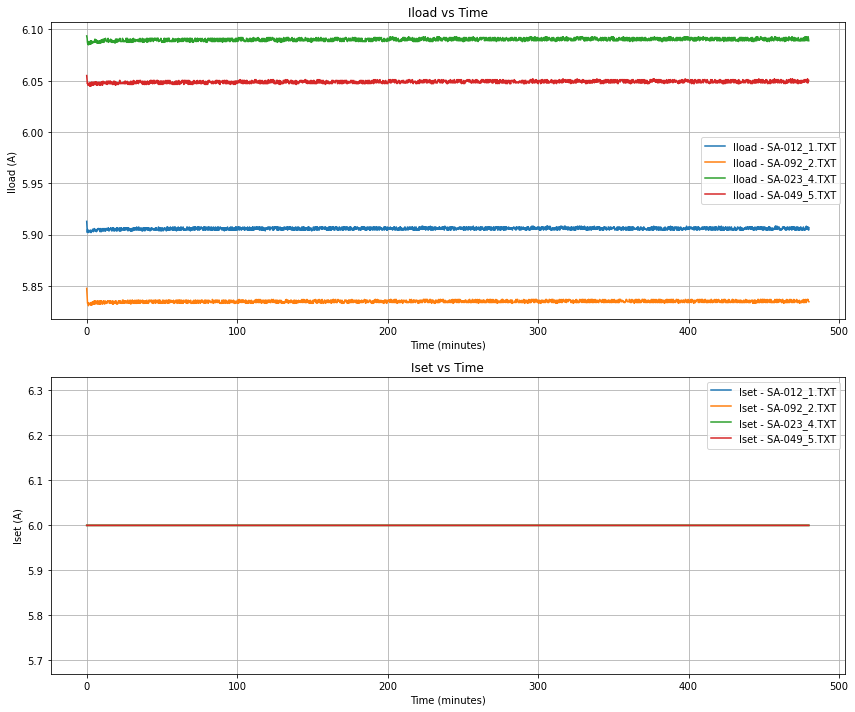

In [22]:
import os
import datetime
import matplotlib.pyplot as plt
import sys

# Suppress output
sys.stdout = open(os.devnull, 'w')

# Your code here that generates lots of output
for i in range(100000):
    print(i)  # This won't be printed

# Re-enable output
sys.stdout = sys.__stdout__

# Define the file names (can be up to 8 files)
files = ["SA-012_1.TXT", "SA-092_2.TXT", "SA-023_4.TXT", "SA-049_5.TXT"]
#files = ["SA-022_0.txt", "SA-024_1.TXT", "SA-025_2.TXT", "SA-026_4.TXT","SA-034_5.TXT", "SA-033_6.TXT"]# "SA-037_7.TXT"]


all_time_lists = []
all_iload_lists = []
all_iset_lists = []
file_labels = []

# Prompt the user to enter a custom label for each file
custom_labels = {}
for file in files:
    label = input(f"Enter a custom label for {file} (or press Enter to use the filename): ")
    custom_labels[file] = label if label else os.path.basename(file)

# Process each file
for file in files:
    if not os.path.exists(file):
        print(f"Error: The file {file} does not exist.")
        continue

    print(f"Processing file: {file}")

    # Initialize lists to store time, Iload, and Iset data for this file
    time_list = []
    iload_list = []
    iset_list = []

    # Open the input file with an appropriate encoding
    with open(file, encoding="utf-8", errors='ignore') as fr:
        # Skip the first 8 lines of .txt i.e., remove the header
        for _ in range(8):
            fr.readline()

        first = False
        t0 = 0

        # Processing the file line by line
        for line in fr.readlines():
            line = line.strip()

            if len(line) == 0:  # Skip empty lines
                continue

            print(f"Processing line: {line}")

            if "restarted" in line:
                first = True
                continue    

            if not first: 
                continue

            chk = line.split("\t")
            print(f"Parsed line into columns: {chk}")  # Debugging: show split columns

            try:
                # Parsing the date and time
                time = datetime.datetime.strptime(chk[0], "%m/%d/%Y %I:%M:%S %p")
                iload = float(chk[10])  # Assuming Iload[A] is the 12th column
                iset = float(chk[11])   # Assuming Iset[A] is the 13th column

                rtime_convert = (time - datetime.datetime(1970, 1, 1)).total_seconds()

                if t0 == 0: 
                    t0 = rtime_convert
                tt = (rtime_convert - t0) / 60  # Convert time from seconds to minutes

                time_list.append(tt)
                iload_list.append(iload)
                iset_list.append(iset)

            except ValueError as ve:
                print(f"Skipping line due to error: {ve}")
                continue

    # Store data for this file if it has valid entries
    if time_list and iload_list and iset_list:
        all_time_lists.append(time_list)
        all_iload_lists.append(iload_list)
        all_iset_lists.append(iset_list)
        file_labels.append(custom_labels[file])
    else:
        print(f"No valid data found in file: {file}")

# Plotting with matplotlib
if all_time_lists:
    plt.figure(figsize=(12, 10))

    # Plot 1: Iload vs Time
    plt.subplot(2, 1, 1)
    for time_list, iload_list, label in zip(all_time_lists, all_iload_lists, file_labels):
        plt.plot(time_list, iload_list, label=f'Iload - {label}')
    plt.title('Iload vs Time')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Iload (A)')
    plt.grid(True)
    plt.legend()

    # Plot 2: Iset vs Time
    plt.subplot(2, 1, 2)
    for time_list, iset_list, label in zip(all_time_lists, all_iset_lists, file_labels):
        plt.plot(time_list, iset_list, label=f'Iset - {label}')
    plt.title('Iset vs Time')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Iset (A)')
    plt.grid(True)
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot.")


# Plots VinHV and VinBrick

Enter a custom label for SA-012_1.TXT (or press Enter to use the filename): 
Enter a custom label for SA-092_2.TXT (or press Enter to use the filename): 
Enter a custom label for SA-023_4.TXT (or press Enter to use the filename): 
Enter a custom label for SA-049_5.TXT (or press Enter to use the filename): 


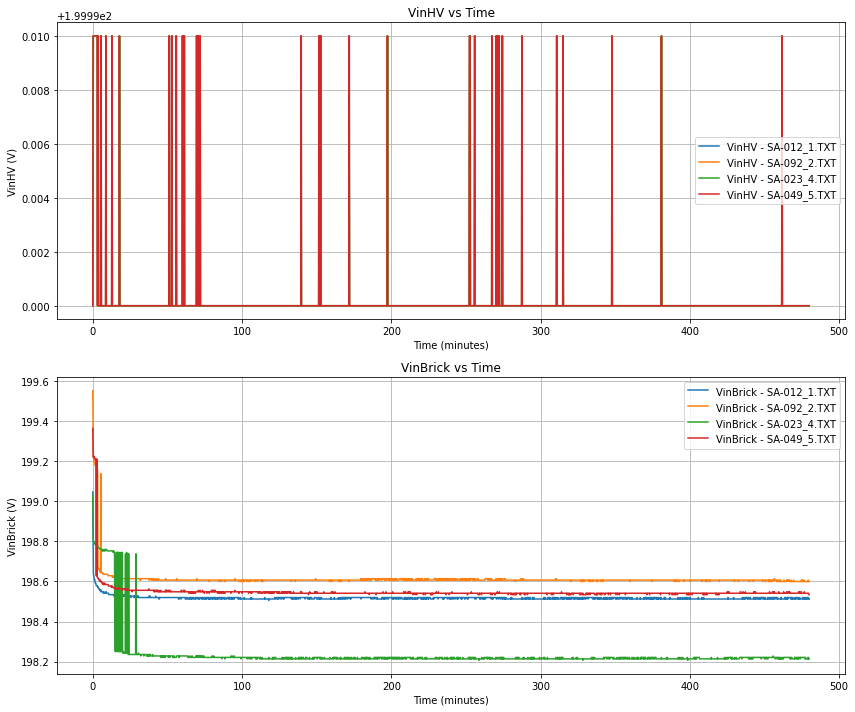

In [24]:
import os
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import sys

# Suppress output
sys.stdout = open(os.devnull, 'w')

# Your code here that generates lots of output
for i in range(100000):
    print(i)  # This won't be printed

# Re-enable output
sys.stdout = sys.__stdout__

# Define the file names (can be up to 8 files)
files = ["SA-012_1.TXT", "SA-092_2.TXT", "SA-023_4.TXT", "SA-049_5.TXT"]
#files = ["SA-022_0.txt", "SA-024_1.TXT", "SA-025_2.TXT", "SA-026_4.TXT","SA-034_5.TXT", "SA-033_6.TXT"]# "SA-037_7.TXT"]

# Initialize lists to store data for each file
all_time_lists = []
all_vinhv_lists = []
all_vinbrick_lists = []
file_labels = []

# Prompt the user to enter a custom label for each file
custom_labels = {}
for file in files:
    label = input(f"Enter a custom label for {file} (or press Enter to use the filename): ")
    custom_labels[file] = label if label else os.path.basename(file)

# Process each file
for file in files:
    if not os.path.exists(file):
        print(f"Error: The file {file} does not exist.")
        continue

    print(f"Processing file: {file}")

    # Initialize lists to store time, VinHV, and VinBrick data for this file
    time_list = []
    vinhv_list = []
    vinbrick_list = []

    # Open the input file with an appropriate encoding
    with open(file, encoding="utf-8", errors='ignore') as fr:
        # Skip the first 8 lines of .txt i.e., remove the header
        for _ in range(8):
            fr.readline()

        first = False
        t0 = 0

        # Processing the file line by line
        for line in fr.readlines():
            line = line.strip()

            if len(line) == 0:  # Skip empty lines
                continue

            print(f"Processing line: {line}")

            if "restarted" in line:
                first = True
                continue    

            if not first: 
                continue

            chk = line.split("\t")
            print(f"Parsed line into columns: {chk}")  # Debugging: show split columns

            try:
                # Parsing the date and time
                time = datetime.datetime.strptime(chk[0], "%m/%d/%Y %I:%M:%S %p")
                vinhv = float(chk[4])  # Assuming VinHV[V] is the 5th column
                vinbrick = float(chk[5])  # Assuming VinBrick[V] is the 6th column

                rtime_convert = (time - datetime.datetime(1970, 1, 1)).total_seconds()

                if t0 == 0: 
                    t0 = rtime_convert
                tt = (rtime_convert - t0) / 60  # Convert time from seconds to minutes

                time_list.append(tt)
                vinhv_list.append(vinhv)
                vinbrick_list.append(vinbrick)

            except ValueError as ve:
                print(f"Skipping line due to error: {ve}")
                continue

    # Store data for this file if it has valid entries
    if time_list and vinhv_list and vinbrick_list:
        all_time_lists.append(time_list)
        all_vinhv_lists.append(vinhv_list)
        all_vinbrick_lists.append(vinbrick_list)
        file_labels.append(custom_labels[file])
    else:
        print(f"No valid data found in file: {file}")

# Plotting with matplotlib
if all_time_lists:
    plt.figure(figsize=(12, 10))

    # Plot 1: VinHV vs Time
    plt.subplot(2, 1, 1)
    for time_list, vinhv_list, label in zip(all_time_lists, all_vinhv_lists, file_labels):
        plt.plot(time_list, vinhv_list, label=f'VinHV - {label}')
    plt.title('VinHV vs Time')
    plt.xlabel('Time (minutes)')
    plt.ylabel('VinHV (V)')
    plt.grid(True)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Disable scientific notation for y-axis

    # Plot 2: VinBrick vs Time
    plt.subplot(2, 1, 2)
    for time_list, vinbrick_list, label in zip(all_time_lists, all_vinbrick_lists, file_labels):
        plt.plot(time_list, vinbrick_list, label=f'VinBrick - {label}')
    plt.title('VinBrick vs Time')
    plt.xlabel('Time (minutes)')
    plt.ylabel('VinBrick (V)')
    plt.grid(True)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Disable scientific notation for y-axis

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot.")


# Plots VoutBrick and VoutLoad

In [ ]:
import os
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import sys

# Suppress output
sys.stdout = open(os.devnull, 'w')

# Your code here that generates lots of output
for i in range(100000):
    print(i)  # This won't be printed

# Re-enable output
sys.stdout = sys.__stdout__

# Define the file names (can be up to 8 files)
files = ["SA-012_1.TXT", "SA-092_2.TXT", "SA-023_4.TXT", "SA-049_5.TXT"]
#files = ["SA-022_0.txt", "SA-024_1.TXT", "SA-025_2.TXT", "SA-026_4.TXT","SA-034_5.TXT", "SA-033_6.TXT"]# "SA-037_7.TXT"]

# Initialize lists to store data for each file
all_time_lists = []
all_voutbrick_lists = []
all_voutload_lists = []
file_labels = []

# Prompt the user to enter a custom label for each file
custom_labels = {}
for file in files:
    label = input(f"Enter a custom label for {file} (or press Enter to use the filename): ")
    custom_labels[file] = label if label else os.path.basename(file)

# Process each file
for file in files:
    if not os.path.exists(file):
        print(f"Error: The file {file} does not exist.")
        continue

    print(f"Processing file: {file}")

    # Initialize lists to store time, VoutBrick, and VoutLoad data for this file
    time_list = []
    voutbrick_list = []
    voutload_list = []

    # Open the input file with an appropriate encoding
    with open(file, encoding="utf-8", errors='ignore') as fr:
        # Skip the first 8 lines of .txt i.e., remove the header
        for _ in range(8):
            fr.readline()

        first = False
        t0 = 0

        # Processing the file line by line
        for line in fr.readlines():
            line = line.strip()

            if len(line) == 0:  # Skip empty lines
                continue

            print(f"Processing line: {line}")

            if "restarted" in line:
                first = True
                continue    

            if not first: 
                continue

            chk = line.split("\t")
            print(f"Parsed line into columns: {chk}")  # Debugging: show split columns

            try:
                # Parsing the date and time
                time = datetime.datetime.strptime(chk[0], "%m/%d/%Y %I:%M:%S %p")
                voutbrick = float(chk[7])  # Assuming VoutBrick[V] is the 8th column
                voutload = float(chk[9])  # Assuming VoutLoad[V] is the 10th column

                rtime_convert = (time - datetime.datetime(1970, 1, 1)).total_seconds()

                if t0 == 0: 
                    t0 = rtime_convert
                tt = (rtime_convert - t0) / 60  # Convert time from seconds to minutes

                time_list.append(tt)
                voutbrick_list.append(voutbrick)
                voutload_list.append(voutload)

            except ValueError as ve:
                print(f"Skipping line due to error: {ve}")
                continue

    # Store data for this file if it has valid entries
    if time_list and voutbrick_list and voutload_list:
        all_time_lists.append(time_list)
        all_voutbrick_lists.append(voutbrick_list)
        all_voutload_lists.append(voutload_list)
        file_labels.append(custom_labels[file])
    else:
        print(f"No valid data found in file: {file}")

# Plotting with matplotlib
if all_time_lists:
    plt.figure(figsize=(12, 10))

    # Plot 1: VoutBrick vs Time
    plt.subplot(2, 1, 1)
    for time_list, voutbrick_list, label in zip(all_time_lists, all_voutbrick_lists, file_labels):
        plt.plot(time_list, voutbrick_list, label=f'VoutBrick - {label}')
    plt.title('VoutBrick vs Time')
    plt.xlabel('Time (minutes)')
    plt.ylabel('VoutBrick (V)')
    plt.xlim(0,8)
    plt.grid(True)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Disable scientific notation for y-axis

    # Plot 2: VoutLoad vs Time
    plt.subplot(2, 1, 2)
    for time_list, voutload_list, label in zip(all_time_lists, all_voutload_lists, file_labels):
        plt.plot(time_list, voutload_list, label=f'VoutLoad - {label}')
    plt.title('VoutLoad vs Time')
    plt.xlabel('Time (minutes)')
    plt.ylabel('VoutLoad (V)')
    plt.xlim(0,8)
    plt.grid(True)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Disable scientific notation for y-axis

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot.")
